
=== SHAP Analysis for Decision Tree ===


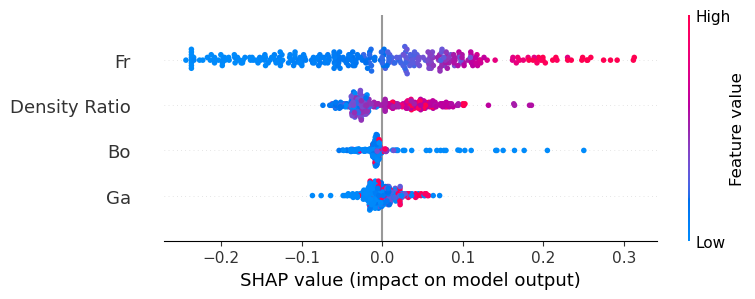

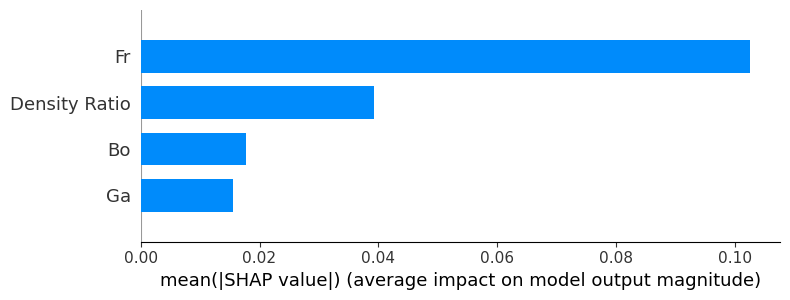


=== SHAP Analysis for Random Forest ===


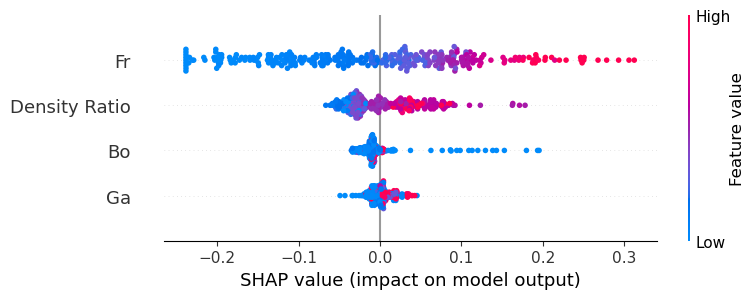

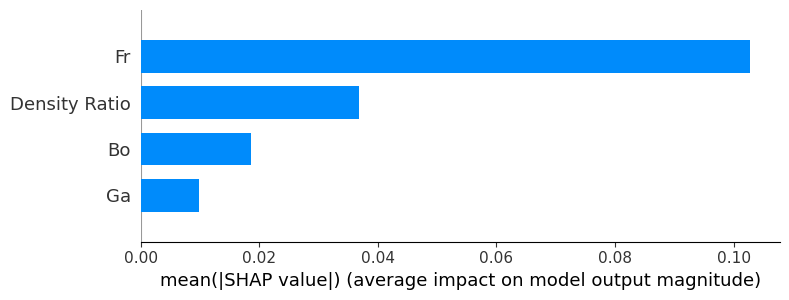


=== SHAP Analysis for XGBoost ===


[14:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


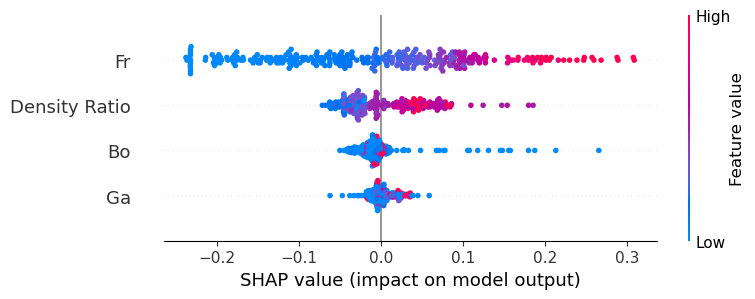

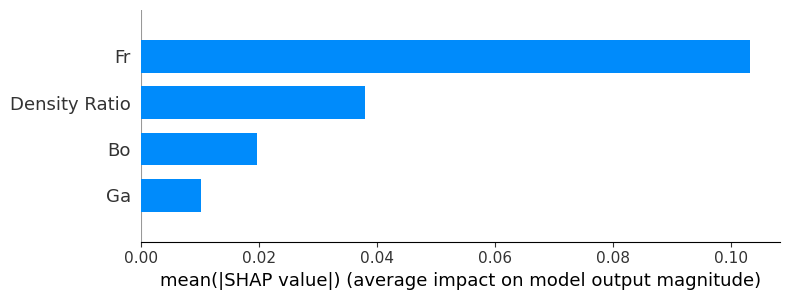


=== SHAP Analysis for Gradient Boosting ===


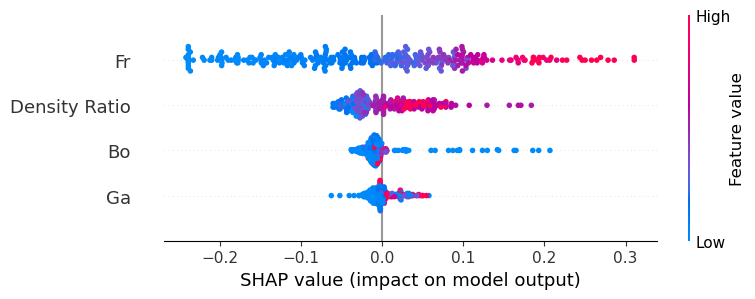

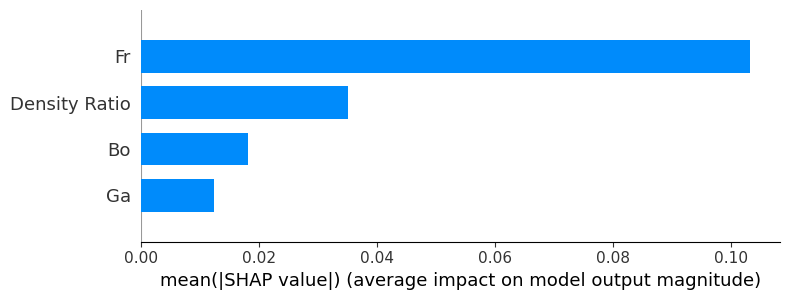

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

# -----------------------------
# Load dataset
# -----------------------------
data = pd.read_excel('Supporting_data.xlsx', sheet_name='alpha')
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['alpha_g']]

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# -----------------------------
# Scaling
# -----------------------------
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_z = MinMaxScaler()
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# -----------------------------
# Best hyperparameters (replace with your tuned values)
# -----------------------------
best_depth_dt = 13
best_params_rf = {'max_depth': 20, 'n_estimators': 200}
best_params_xgb = {'max_depth': 7, 'n_estimators': 350}
best_params_gb = {'max_depth': 5, 'n_estimators': 300}

# -----------------------------
# --- SHAP Analysis ---
# -----------------------------
models = {
    'Decision Tree': DecisionTreeRegressor(max_depth=best_depth_dt, random_state=0),
    'Random Forest': RandomForestRegressor(max_depth=best_params_rf['max_depth'],
                                           n_estimators=best_params_rf['n_estimators'], random_state=0),
    'XGBoost': XGBRegressor(max_depth=best_params_xgb['max_depth'],
                            n_estimators=best_params_xgb['n_estimators'], learning_rate=0.1, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(max_depth=best_params_gb['max_depth'],
                                                   n_estimators=best_params_gb['n_estimators'], learning_rate=0.1, random_state=0)
}

for name, model in models.items():
    print(f"\n=== SHAP Analysis for {name} ===")
    
    # Train model
    model.fit(X_train_scaled, z_train_scaled.ravel())
    
    # Create SHAP explainer
    explainer = shap.TreeExplainer(model)
    
    # Compute SHAP values
    shap_values = explainer.shap_values(X_test_scaled)
    
    # Dot summary plot
    plt.figure(figsize=(8,5))
    shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=True)
    
    # Bar feature importance plot
    plt.figure(figsize=(8,5))
    shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar', show=True)
